In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

**STEP 02 : UPLOAD DATASET**

In [ ]:
df=pd.read_csv('//content/taxi_trip_pricing (1).csv')
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180
...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090


In [ ]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Handle missing or unknown values by replacing them with the most frequent value (mode)
df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0], inplace=True)
df['Traffic_Conditions'].fillna(df['Traffic_Conditions'].mode()[0], inplace=True)
df['Weather'].fillna(df['Weather'].mode()[0], inplace=True)

# Replace 'Unknown' or any unexpected value with the mode
valid_time_categories = ['Morning', 'Afternoon', 'Evening', 'Night']
df['Time_of_Day'] = df['Time_of_Day'].apply(lambda x: x if x in valid_time_categories else df['Time_of_Day'].mode()[0])

valid_traffic_categories = ['Low', 'Medium', 'High']
df['Traffic_Conditions'] = df['Traffic_Conditions'].apply(lambda x: x if x in valid_traffic_categories else df['Traffic_Conditions'].mode()[0])

valid_weather_categories = ['Clear', 'Rain', 'Snow']
df['Weather'] = df['Weather'].apply(lambda x: x if x in valid_weather_categories else df['Weather'].mode()[0])

# Encode categorical columns using OrdinalEncoder
Time_of_Day_encoder = OrdinalEncoder(categories=[valid_time_categories])
df['Time_of_Day_Encoded'] = Time_of_Day_encoder.fit_transform(df[['Time_of_Day']]).astype(int)

df['Day_of_Week_Encoded'] = df['Day_of_Week'].map({'Weekday': 0, 'Weekend': 1})

traffic_encoder = OrdinalEncoder(categories=[valid_traffic_categories])
df['Traffic_Conditions_Encoded'] = traffic_encoder.fit_transform(df[['Traffic_Conditions']]).astype(int)

weather_encoder = OrdinalEncoder(categories=[valid_weather_categories])
df['Weather_Encoded'] = weather_encoder.fit_transform(df[['Weather']]).astype(int)



In [ ]:
df

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Time_of_Day_Encoded,Day_of_Week_Encoded,Traffic_Conditions_Encoded,Weather_Encoded
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624,0,0.0,0,0
1,47.59,Afternoon,Weekday,1.0,High,Clear,3.52,0.62,0.43,40.57,50.0745,1,0.0,2,0
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032,2,1.0,2,0
3,30.33,Evening,Weekday,4.0,Low,Clear,3.48,0.51,0.15,116.81,36.4698,2,0.0,0,0
4,25.83,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180,2,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049,1,1.0,1,0
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,0.29,61.96,62.1295,3,0.0,1,0
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,0.29,54.18,33.1236,0,0.0,0,1
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090,0,0.0,0,0


**Corelation**

In [ ]:
df[['Trip_Distance_km', 'Passenger_Count', 'Base_Fare','Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes','Time_of_Day_Encoded','Day_of_Week_Encoded','Traffic_Conditions_Encoded','Weather_Encoded', 'Trip_Price']].corr()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Time_of_Day_Encoded,Day_of_Week_Encoded,Traffic_Conditions_Encoded,Weather_Encoded,Trip_Price
Trip_Distance_km,1.000000,-0.046130,0.031812,-0.015846,-0.025494,-0.021262,0.024951,-0.024090,0.094591,0.017417,0.830479
Passenger_Count,-0.046130,1.000000,0.022886,0.033049,0.037063,0.018297,0.008738,0.033282,-0.018218,0.002369,-0.013809
Base_Fare,0.031812,0.022886,1.000000,0.003034,-0.018047,0.011834,0.041066,-0.025974,0.027787,-0.032033,0.033103
Per_Km_Rate,-0.015846,0.033049,0.003034,1.000000,0.028250,0.027199,0.036272,-0.043792,-0.058535,0.043674,0.267464
Per_Minute_Rate,-0.025494,0.037063,-0.018047,0.028250,1.000000,-0.023683,0.060570,0.005681,-0.027870,-0.021278,0.131534
Trip_Duration_Minutes,-0.021262,0.018297,0.011834,0.027199,-0.023683,1.000000,-0.063304,-0.008515,-0.003927,0.017534,0.216492
Time_of_Day_Encoded,0.024951,0.008738,0.041066,0.036272,0.060570,-0.063304,1.000000,0.046079,0.059736,0.039489,0.003127
Day_of_Week_Encoded,-0.024090,0.033282,-0.025974,-0.043792,0.005681,-0.008515,0.046079,1.000000,-0.010471,0.023687,-0.032390
Traffic_Conditions_Encoded,0.094591,-0.018218,0.027787,-0.058535,-0.027870,-0.003927,0.059736,-0.010471,1.000000,-0.016534,0.067425
Weather_Encoded,0.017417,0.002369,-0.032033,0.043674,-0.021278,0.017534,0.039489,0.023687,-0.016534,1.000000,0.032919


## Feature Selection and Target Variable Definition

In [ ]:
X = df.loc[:, ['Trip_Distance_km', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']]
y = df['Trip_Price']


In [ ]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(0)

# Generate shuffled indices
indices = np.random.permutation(len(X))

# Define split point (80% training, 20% testing)
split_point = int(0.8 * len(X))

# Split the data
X_train, X_test = X.iloc[indices[:split_point]], X.iloc[indices[split_point:]]
y_train, y_test = y.iloc[indices[:split_point]], y.iloc[indices[split_point:]]


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fits and transforms training data
X_test_scaled = scaler.transform(X_test)  # Transforms test data using the same scaler


In [ ]:
model=LinearRegression()

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the column mean
imputer = SimpleImputer(strategy='mean')

# Apply imputation to the training and testing data
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Now, fit the model again
model.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

## Model Evaluation and Improvement

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 10.649838921485571
MSE: 186.43734565356579
R² Score: 0.8080513139255449


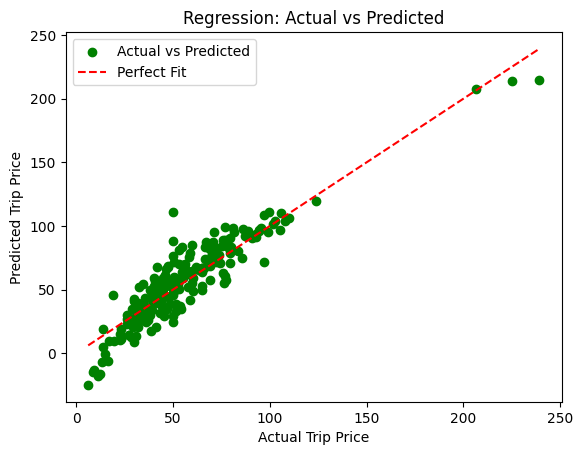

In [ ]:
y_pred_test = model.predict(X_test_scaled)

plt.scatter(y_test, y_pred_test, color='', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
         color='red', linestyle='dashed', label='Perfect Fit')

plt.xlabel('Actual Trip Price')
plt.ylabel('Predicted Trip Price')
plt.title('Regression: Actual vs Predicted')
plt.legend()
plt.show()
